In [2]:
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

### FUNCIONES

In [3]:
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def show_fft(data):
    x = fft(data)
    N = len(x)
    n = np.arange(N)
    sr = 256
    T = N/sr
    freq = n/T 
    n_oneside = N//2
    f_oneside = freq[:n_oneside]
    plt.figure(figsize=(20,10))
    plt.semilogy(f_oneside, np.abs(x[:n_oneside]))
    plt.xticks(np.arange(min(f_oneside), max(f_oneside)+1, 5.0))
    #plt.xlim([-10,x_top_limit])
    plt.grid()
    #plt.ylim([0,y_top_limit])
    plt.show()

def plot_channels(data):
    fig, ax = plt.subplots(8, figsize=(20,35))
    fig2, ax2 = plt.subplots(8, figsize=(20,35))
    for index in range(8):
        ranges = range(len(data[index]))
        ax[index].plot(data[index])
        ax[index].set_title("Canal "+str(index+1))
        ax[index].set_xticks(np.arange(min(ranges), max(ranges)+1, 400.0))
        ax[index].grid()
    for index in range(8):
        ranges = range(len(data[index+8]))
        ax2[index].plot(data[index+8])
        ax2[index].set_title("Canal "+str(index+9))   
        ax2[index].set_xticks(np.arange(min(ranges), max(ranges)+1, 400.0))
        ax2[index].grid()
    plt.show()

def set_axes(ax,data, limits, first_plot=True):
    sr = 2400
    for index in range(8):
        x = fft(data[index if first_plot==True else index+8][limits[0]:limits[1]])
        N = len(x)
        n = np.arange(N)
        T = N/sr
        freq = n/T
        n_oneside = N//2
        f_oneside = freq[:n_oneside]
        ax[index].plot(f_oneside, np.abs(x[:n_oneside]))
        ax[index].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 2.0))
        ax[index].set_xlim([-10,40])
        ax[index].set_ylim([0,10000])
        ax[index].grid()
        ax[index].set_title("Canal "+str(index if first_plot==True else index+8))

def plot_ffts(data, limits):
    fig, ax = plt.subplots(8, figsize=(20,35))
    fig2, ax2 = plt.subplots(8, figsize=(20,35))

    set_axes(ax, data, limits)
    set_axes(ax2, data, limits, first_plot=False)
    
    plt.show()

def delete_trash_data(data, avoid_data):
    x = [0]*len(data)
    for index in range(len(data)):
        x[index] = data[index][avoid_data:]
    return x

### LEER DATA

In [6]:
x = np.load("Gary_23_5_ssvep_propio_v2.npy")

x = x.T

avoid_data = 30

data = delete_trash_data(x, avoid_data)



### PLOT EN TIEMPO

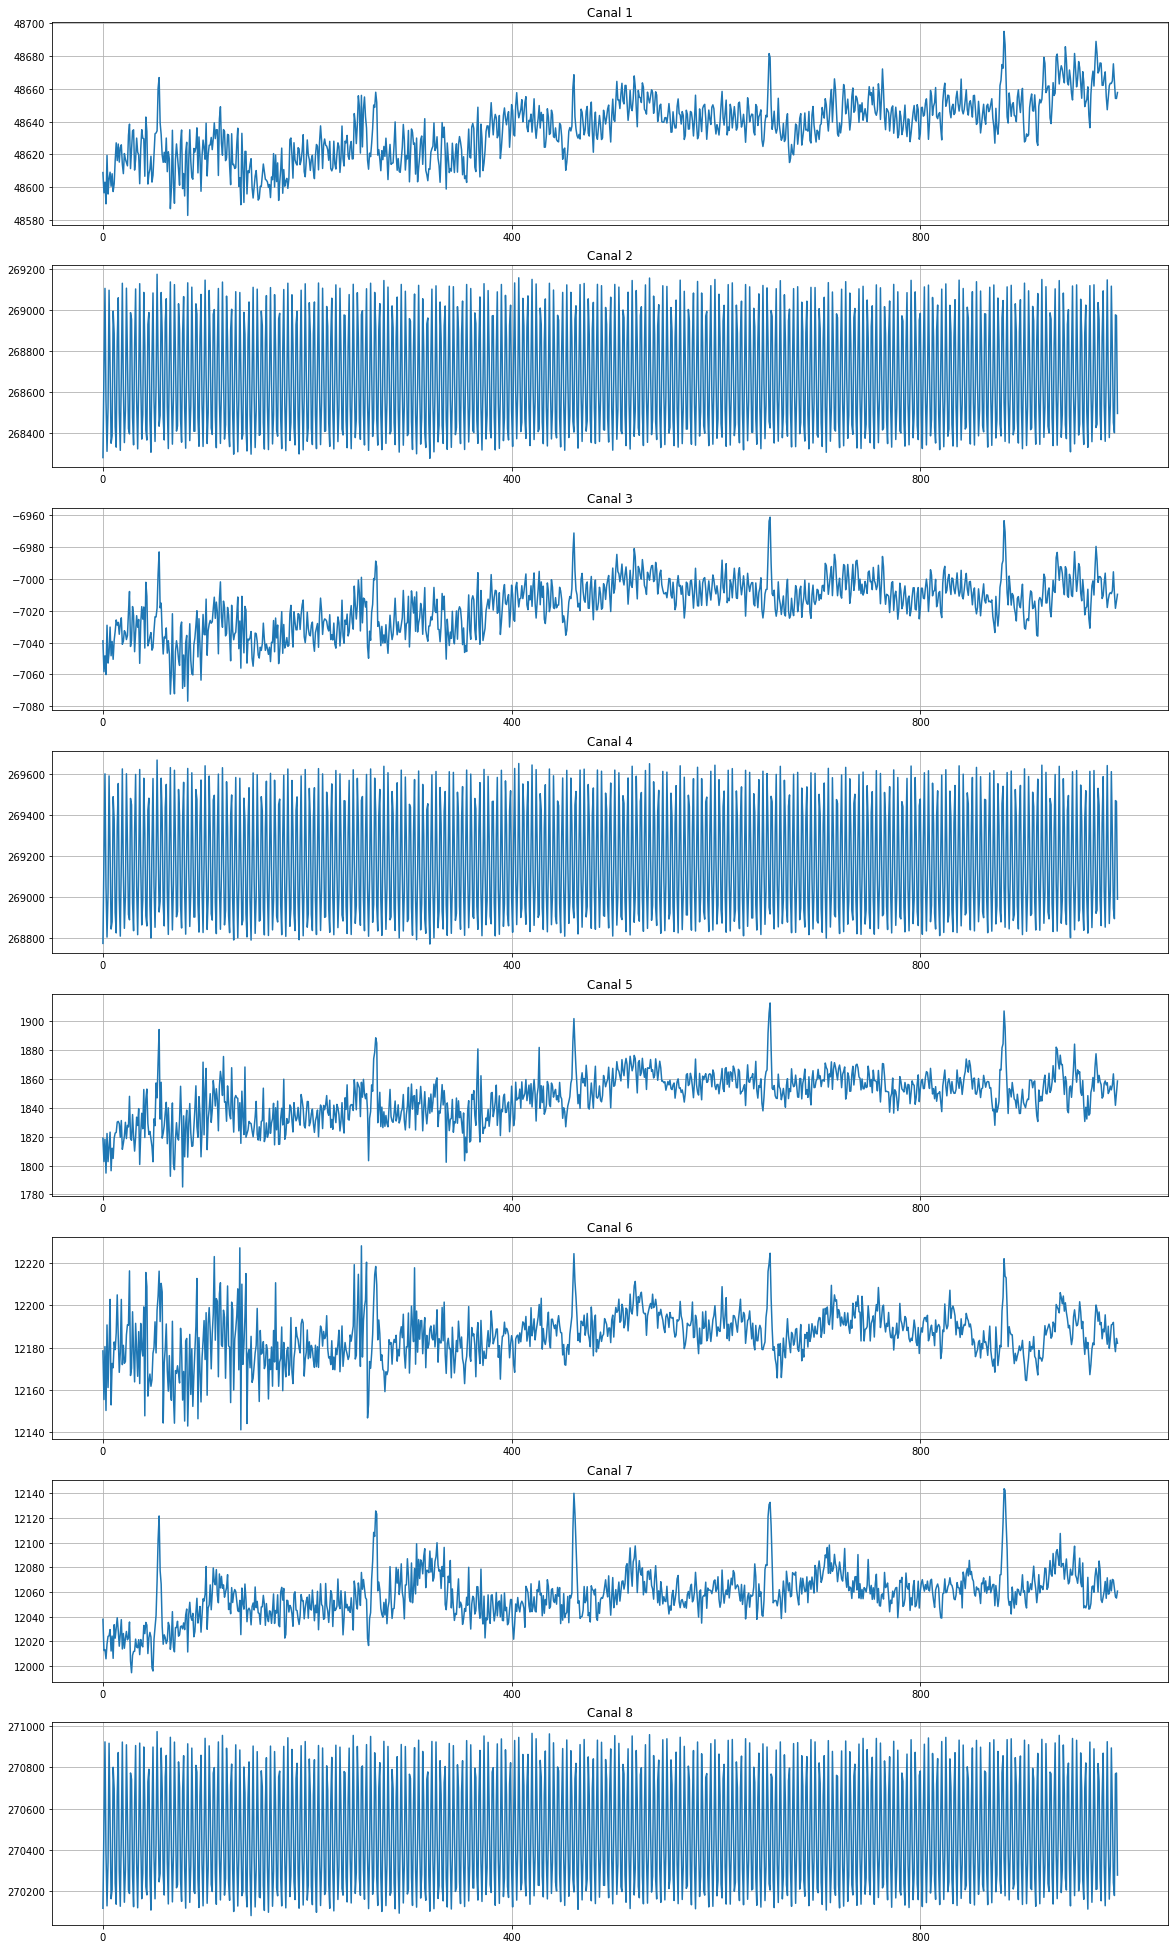

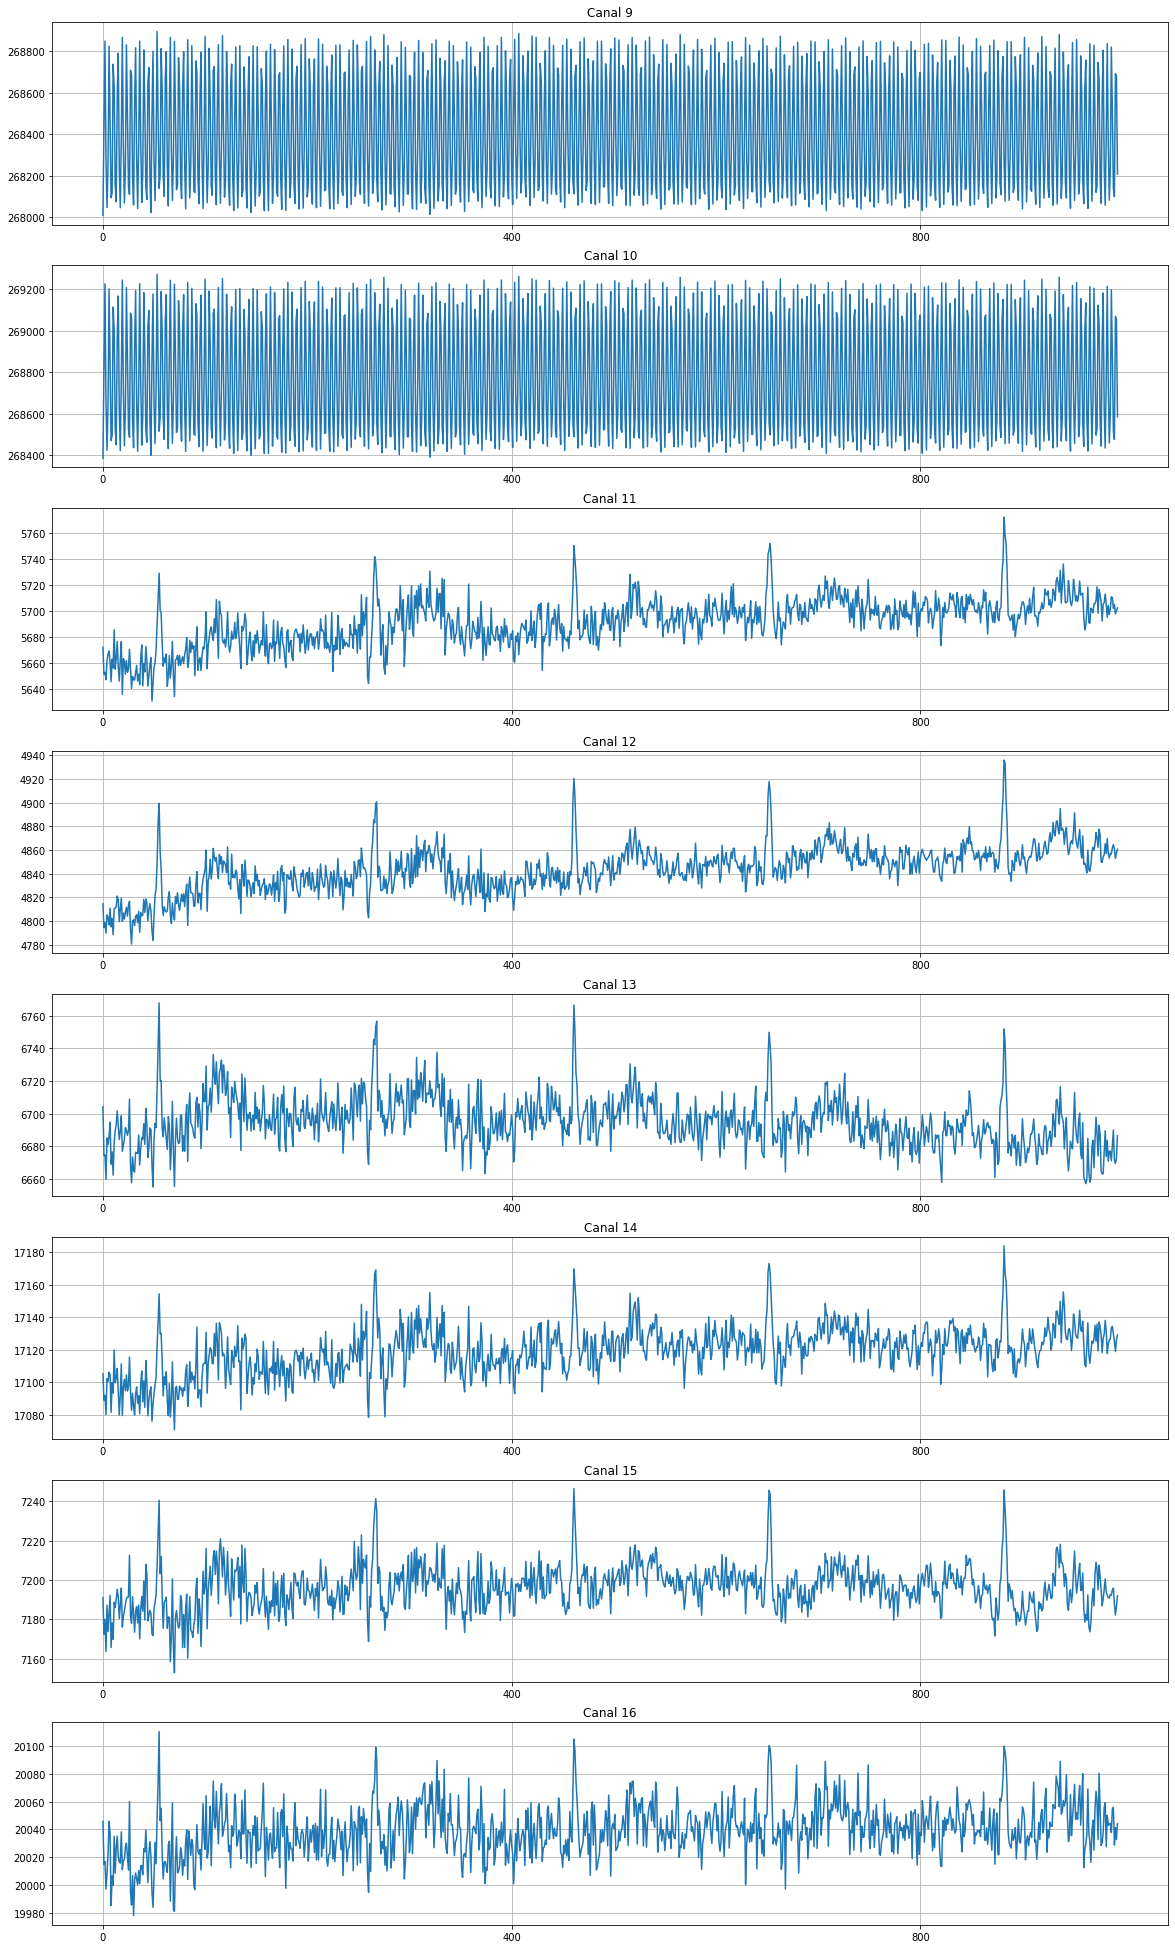

In [7]:
plot_channels(data)

### NORMALIZACION Y FILTRADO

In [55]:
y = data[6] - data[2]

y_norm = (y-np.min(y))/(np.max(y)-np.min(y))

y_filtered = bandpass_filter(data=y_norm, lowcut=7, highcut=22, fs=256, order=9)

### PLOT EN FRECUENCIA

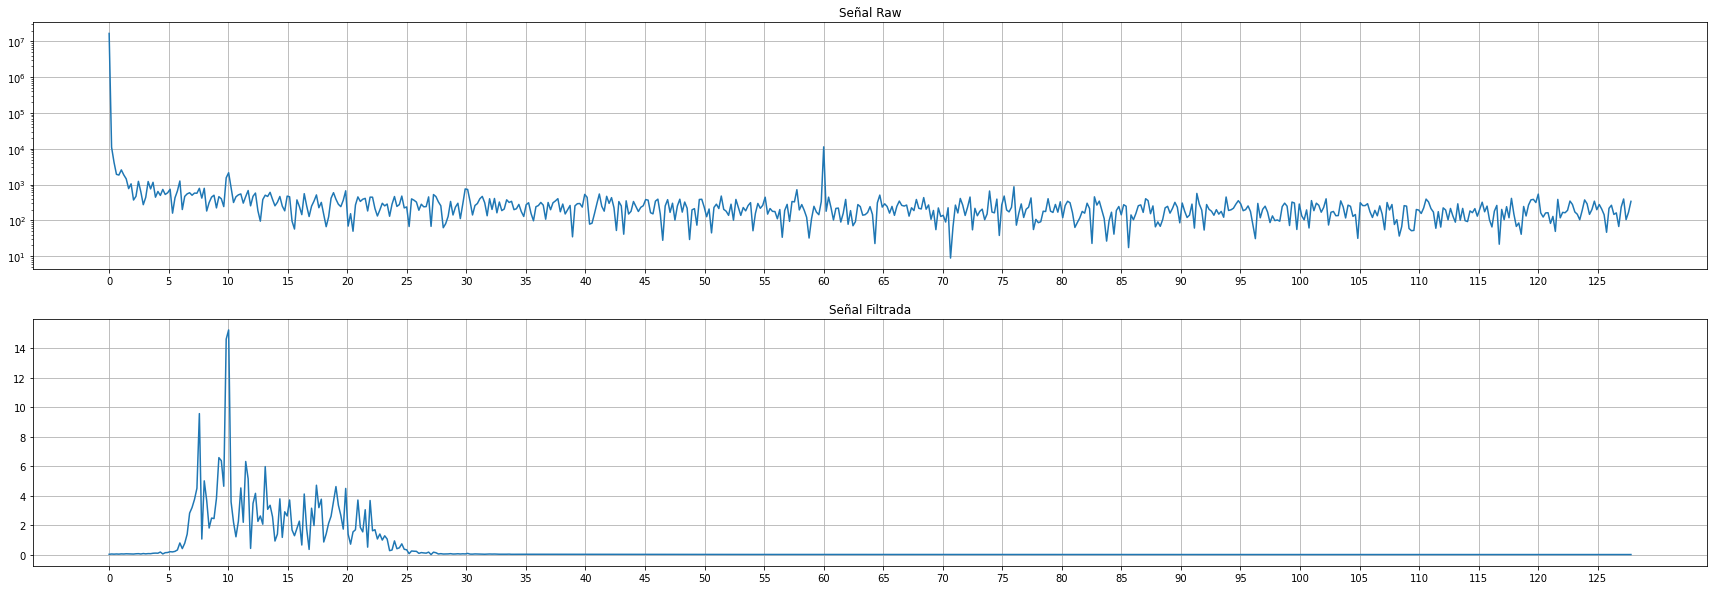

In [56]:
y_fft = fft(y)
y_filtered_fft = fft(y_filtered)
N = len(y_fft)
n = np.arange(N)
sr = 256
T = N/sr
freq = n/T 
n_oneside = N//2
f_oneside = freq[:n_oneside]

fig, ax = plt.subplots(2, figsize=(30,10))
ax[0].semilogy(f_oneside, np.abs(y_fft[:n_oneside]))
ax[0].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 5.0))
ax[0].set_title("Señal Raw")
ax[0].grid()
#ax[0].set_ylim([0,50])
ax[1].plot(f_oneside, np.abs(y_filtered_fft[:n_oneside]))
ax[1].set_xticks(np.arange(min(f_oneside), max(f_oneside)+1, 5.0))
ax[1].grid()
ax[1].set_title("Señal Filtrada")
plt.show()

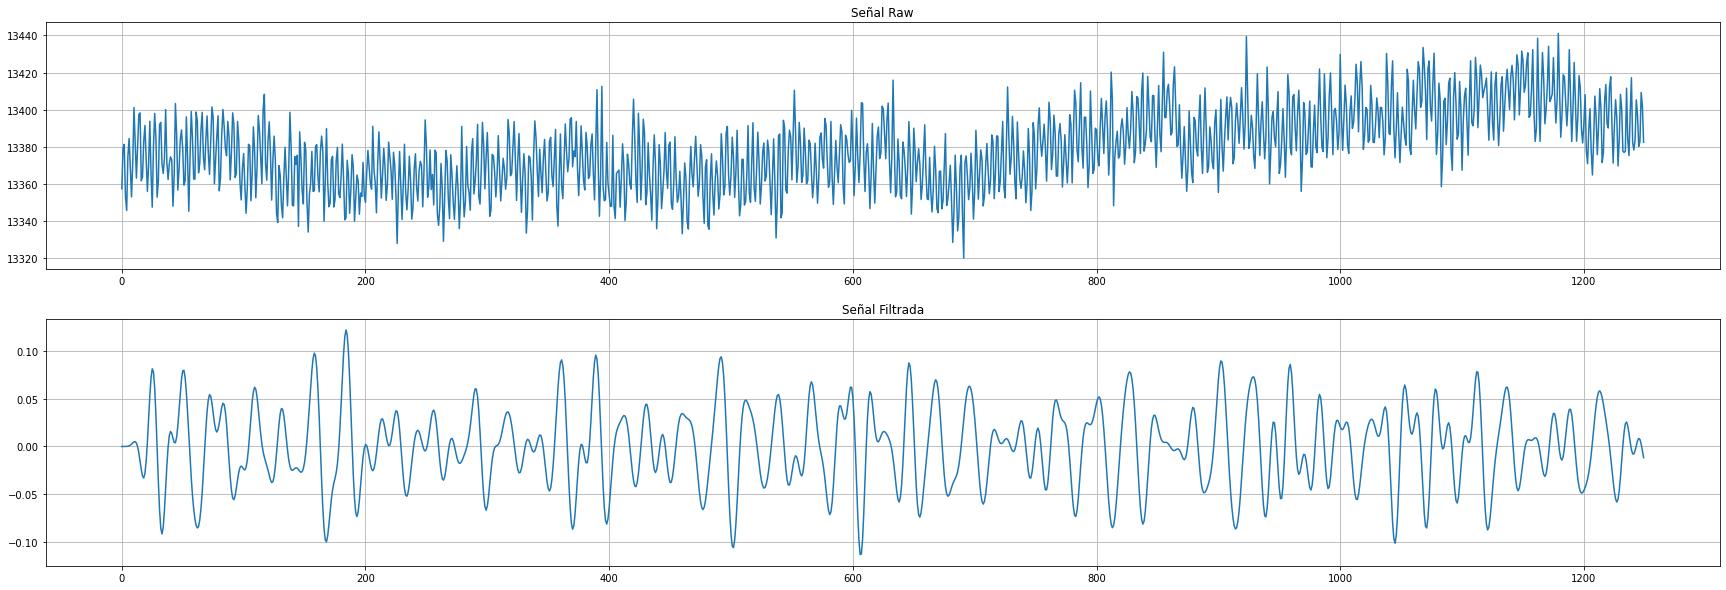

In [42]:
figs, axs = plt.subplots(2,figsize=(30,10))
axs[0].plot(y)
axs[0].set_title("Señal Raw")
axs[0].grid()
axs[1].plot(y_filtered)
axs[1].set_title("Señal Filtrada")
axs[1].grid()
plt.show()
